# Exploratory data analysis

In [1]:
!pip install wordcloud

## Import dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Data Preparation

In [6]:
# Get data from github
!wget --quiet 'https://raw.githubusercontent.com/Miloo-w1-tcc/Modul/master/Sample.xlsx'

In [4]:
# Read data csv
filename = 'Data/all_keywords.csv'
df_data = pd.read_csv(filename)

In [5]:
df_data.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,keyword
0,The Grinch,@gloomybloomy_,2021-04-16T21:57:12.000Z,"Karma is not real, but kurma is.",NaN,NaN,NaN,NaN,1,[],https://twitter.com/gloomybloomy_/status/13831...,kurma
1,Iftahfia,@kentangmaribuan,2021-04-15T13:18:30.000Z,Replying to \n@kentangmaribuan,Yg sbenernya gw gedeg dan bikin badmod. Di ant...,NaN,1,NaN,NaN,[],https://twitter.com/kentangmaribuan/status/138...,kurma
2,Iftahfia,@kentangmaribuan,2021-04-15T13:18:31.000Z,5 jt\n5. Nanti habis solat akan ada pembagian ...,NaN,NaN,1,NaN,NaN,[],https://twitter.com/kentangmaribuan/status/138...,kurma
3,Yuni Cahya,@yuni_ce,2021-04-14T13:30:18.000Z,kurma keijuu ini....gak ada lawan...,NaN,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/media/Ey8BkYMUUAAUZjl?...,https://twitter.com/yuni_ce/status/13823253436...,kurma
4,FESS,@FOODFESS2,2021-04-13T17:41:16.000Z,fess kalian sahur ada yg ga pake nasi? biasany...,NaN,NaN,28,1,1,[],https://twitter.com/FOODFESS2/status/138202611...,kurma


In [7]:
df_data = df_data.dropna(subset=['Text'])

## Exploratory data analysis

### Class (Complaint Type) Distribution

In [8]:
df_data['keyword'].value_counts()

gorengan          61
kurma             35
es buah           28
kolak             24
es campur         24
es dawet           9
es kelapa muda     8
es cincau          3
sop buah           1
Name: keyword, dtype: int64

<AxesSubplot:ylabel='keyword'>

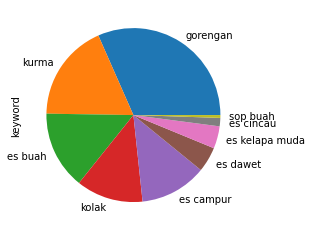

In [9]:
df_data['keyword'].value_counts().plot(kind='pie')

### Class Distribution Based on Percentage

In [10]:
df_percent = ((df_data['keyword'].value_counts() / df_data['keyword'].value_counts().sum())*100)

In [11]:
df_percent

gorengan          31.606218
kurma             18.134715
es buah           14.507772
kolak             12.435233
es campur         12.435233
es dawet           4.663212
es kelapa muda     4.145078
es cincau          1.554404
sop buah           0.518135
Name: keyword, dtype: float64

<AxesSubplot:>

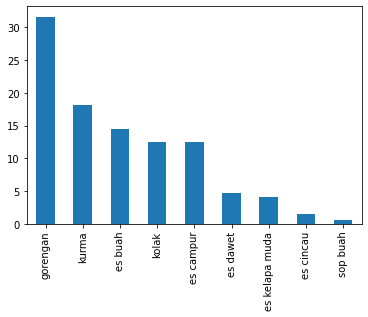

In [12]:
df_percent.plot(kind='bar')

### Word Distribution

In [17]:
df_data['Text'].head()

0                     Karma is not real, but kurma is.
1                       Replying to \n@kentangmaribuan
2    5 jt\n5. Nanti habis solat akan ada pembagian ...
3                 kurma keijuu ini....gak ada lawan...
4    fess kalian sahur ada yg ga pake nasi? biasany...
Name: Text, dtype: object

In [18]:
df_data['Text'].str.split().head()

0             [Karma, is, not, real,, but, kurma, is.]
1                     [Replying, to, @kentangmaribuan]
2    [5, jt, 5., Nanti, habis, solat, akan, ada, pe...
3           [kurma, keijuu, ini....gak, ada, lawan...]
4    [fess, kalian, sahur, ada, yg, ga, pake, nasi?...
Name: Text, dtype: object

In [19]:
df_text_explode = df_data['Text'].str.split().explode()

In [20]:
df_text_explode.head()

0    Karma
0       is
0      not
0    real,
0      but
Name: Text, dtype: object

In [21]:
df_text_explode.tail()

192     nitip
192        es
192    kelapa
192      muda
192        sa
Name: Text, dtype: object

<AxesSubplot:>

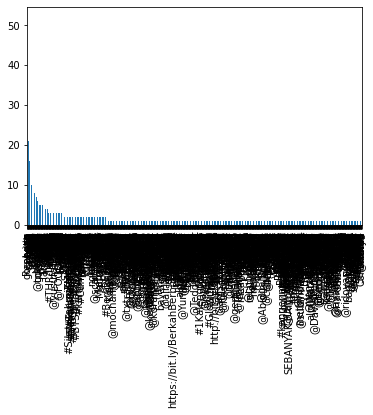

In [22]:
df_text_explode.value_counts().plot(kind='bar')

### Word Distribution with WordCloud

In [23]:
text = ' '.join(df_data['Text'])

In [24]:
text

'Karma is not real, but kurma is. Replying to \n@kentangmaribuan 5 jt\n5. Nanti habis solat akan ada pembagian takjil/kurma untuk jamaah, sodaqoh dari si A\n"Untuk itu mari kita hadiahi surat alfatihah semoga rizqi mereka lancar". kurma keijuu ini....gak ada lawan... fess kalian sahur ada yg ga pake nasi? biasanya apa kalo ngga pake nasi? Bisa pake oats, roti gandum, sourdough atau kurma sih kalo mau kenyang yg awet Ku bangunin suami, mnta beliin gas, yg mana itu sudah jam 3, sambil nunggu tuntasin potong sayur, minum susu kurma, dan uda stegah 4 suami blm balik, uda feeling, gda tukang gas yang buka hahahahha, \nakhirnya dateng dan bener gda, gda yg jual lauk jg, oke, ada sisa ayam aku makan Kurma memang best deals untuk bulan puasa. Cepet dan enakkkk Gue mau ngingetin temen2 lagi yaa utk JANGAN MINUM TEH PAS SAHUR krn efek diuretiknya bikin sering pipis yg berisiko dehidrasi. Mending air anget atau susu. Kalau gue sih prefer susu, kayak Bear Brand. Apalagi musim flu begini. Cocok ban

In [25]:
wordcloud_tweet = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)

In [26]:
wordcloud_tweet

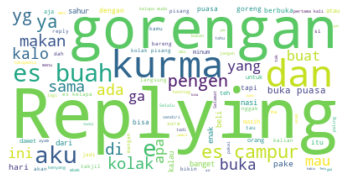

In [27]:
plt.figure()
plt.imshow(wordcloud_tweet, interpolation="bilinear")
plt.axis("off")
plt.show()